# Unsupervised Learning | Clustering (DBSCAN)

Today's Outline:
- Intuition
- Full Case-study

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

==========

## DBSCAN Clustering | Intuition (Moon)

Scikit-Learn Clustering Module: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

Visualizing DBSCAN Clustering: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

### Importing Data

In [4]:
moons = pd.read_csv('moons.csv')
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


### Exploring Data

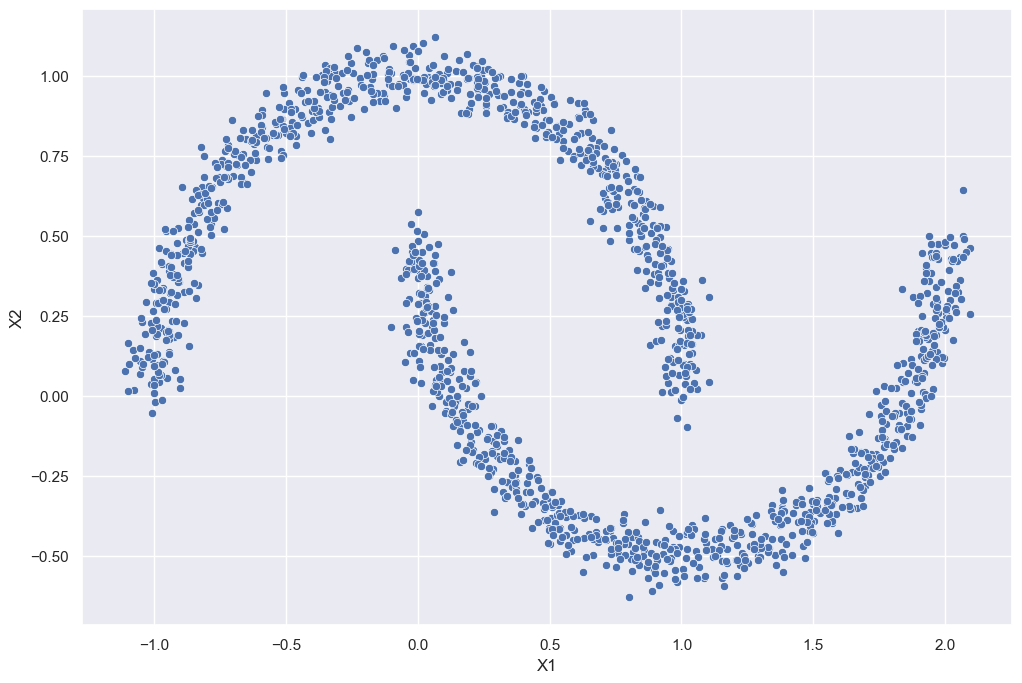

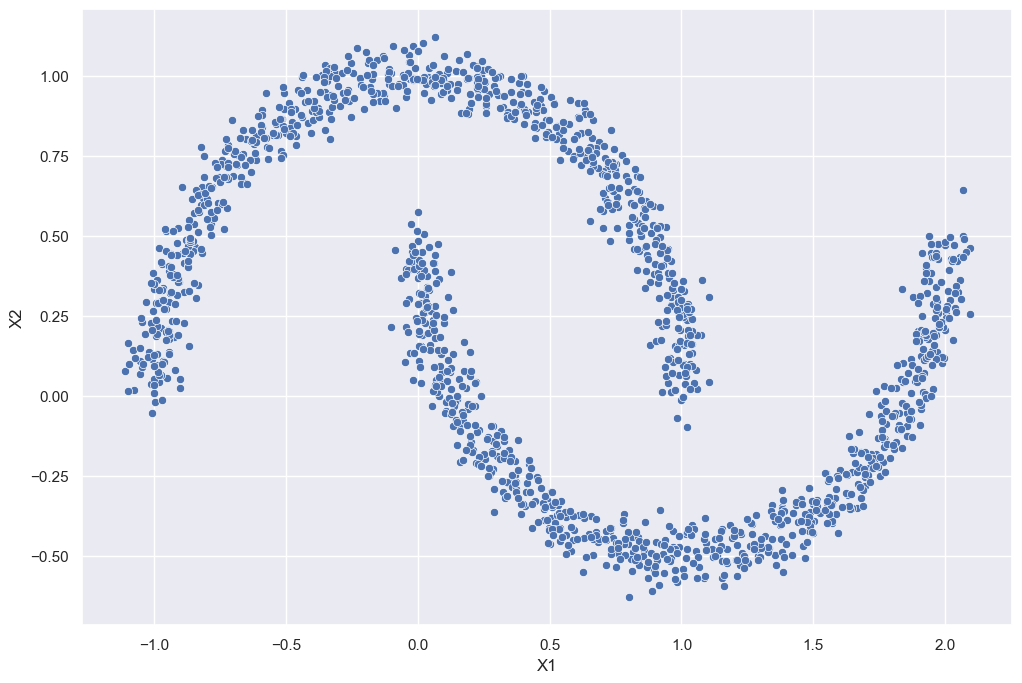

In [6]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='X1',y='X2',data=moons)
plt.show()

### DBSCAN vs. K-Means

##### K-Means Clustering

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)

In [14]:
# K-Means Clustering
labels = model.fit_predict(moons)
labels

array([0, 0, 0, ..., 1, 0, 0])

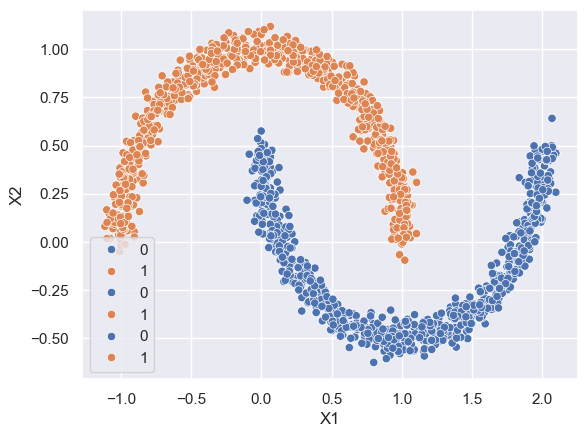

In [16]:
# Plotting K-Means Clusters
sns.scatterplot(data=moons,x='X1',y='X2',hue=labels)
plt.show()

##### DBSCAN Clustering

In [10]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.2)

In [11]:
# DBSCAN Clustering
labels = model.fit_predict(moons)
labels

array([0, 0, 0, ..., 1, 0, 0])

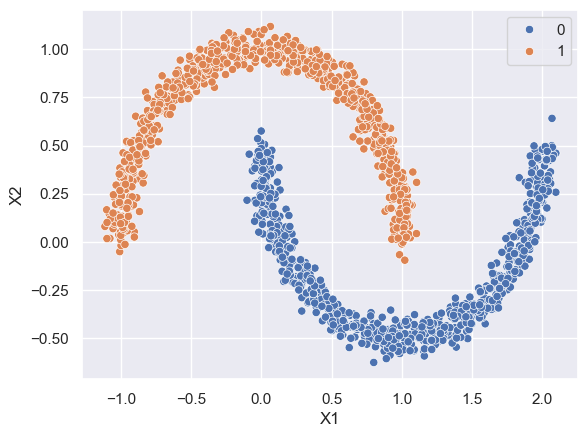

In [17]:
# Plotting DBSCAN Clusters
sns.scatterplot(data=moons,x='X1',y='X2',hue=labels)
plt.show()

==========

## DBSCAN Clustering | Full Case-study (Wholesale Customers)

Dataset: https://archive.ics.uci.edu/ml/datasets/wholesale+customers

### Importing & Inspecting Data

In [ ]:
whole = pd.read_csv('data/wholesale-customers-data.csv')

In [ ]:
whole.head()

In [ ]:
whole.info()

### Exploring Data

In [ ]:
# Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column
sns.scatterplot(data=whole,x='Milk',y='Grocery',hue='Channel', palette='Set1')

In [ ]:
# Use seaborn to create a histogram of MILK spending, colored by Channel.
sns.histplot(whole,x='Milk',hue='Channel')

In [ ]:
# Create an annotated clustermap of the correlations between spending on different cateogires.
sns.clustermap(whole.drop(['Region','Channel'],axis=1).corr(),annot=True);

In [ ]:
# Create a PairPlot of the dataframe, colored by Region.
sns.pairplot(whole,hue='Region',palette='Set1')

### Model Building & Predicting

In [ ]:
# Since the values of the features are in different orders of magnitude
# let's scale the data. Use StandardScaler to scale the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(whole)

In [ ]:
scaled_X

##### DBSCAN with Unknown Value of Epsilon

In [ ]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

In [ ]:
# Create a line plot of the percentage of outlier points versus the epsilon value choice.
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

##### DBSCAN with Chosen Value of Epsilon

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=2)
dbscan.fit(scaled_X)

In [ ]:
# Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.
sns.scatterplot(data=whole,x='Grocery',y='Milk',hue=dbscan.labels_, palette='Set1')

In [ ]:
# Create a scatterplot of Milk vs. Detergents Paper colored by the labels.
sns.scatterplot(data=whole,x='Detergents_Paper',y='Milk',hue=dbscan.labels_)

In [ ]:
# Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.
whole['Labels'] = dbscan.labels_

In [ ]:
whole.head()

In [ ]:
# Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.
categories_mean = whole.drop(['Channel','Region'],axis=1).groupby('Labels').mean()
categories_mean

In [ ]:
# Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(categories_mean)
scaled_means = pd.DataFrame(data,categories_mean.index,categories_mean.columns)

In [ ]:
scaled_means

In [ ]:
sns.heatmap(scaled_means)

In [ ]:
# Create another heatmap similar to the one above, but with the outliers removed
sns.heatmap(scaled_means.loc[[0,1]],annot=True)

==========

# THANK YOU!